## Bank Customer Churn Prediction

### Business Understanding

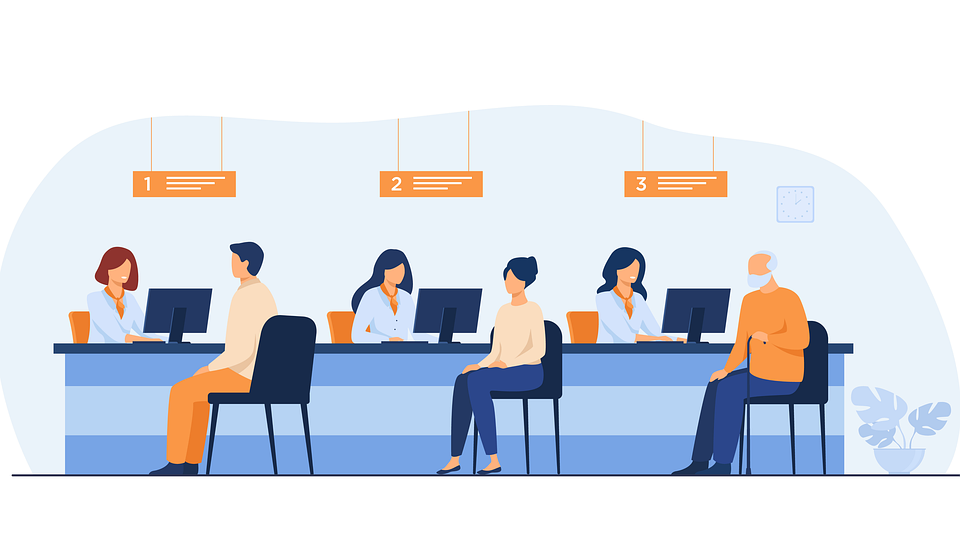

Churn rate is the measure of how many items or individuals are moving out of a particular group, in this case how many customers are unsubscribing from a bank's services.Customer churn has become a major problem among financial institutions given that their revenue stream is directly related to the amount of customers that subscribe and pay for their services and products therefore earning them revenue. A bank with a high churn rate loses many subscribers which results in lower growth rates and this has an even bigger impact on sales and profits while an institution having a low churn rate is an indication that it can retain its customers.A major startegy of many financial institutions while trying to maintain their growth trajectory is to acqure new customers, while this is an effective approach, it is not as important as retaining the customers that the business already has and this is because acquring a new customer costs way more than retaining an existing one.

It is important for a business to be able to identify customers at risk of churning and come up with startegies that will maximize the likelihood of the customer staying.This is quite difficult especially for a large banking institution with many different types of customers, to know why a customer is cancelling their subscription to its services because of their different behaviours and preferences.In the current digital environment where it is very easy for a customer to switch from one banking institution to another , customer churn prediction will allow a bank to identify when a customer is about to leave and act proactively to reverse a potential customer chrun and mitigate revenue losses.

This project aims to help a bank or similar banking institions with :
1. Customer retention
2. Increase their profits
3. Improve customer experience
4. Optimization of their products and services.
5. Gain insights on why they are loosing customers

#### Data 
This project will use a dataset obtained from the customers of ABC Multinational Bank. It has 10,000 observations and 12 features.It contains the following columns:

1. customer_id - unique identification number of a customer
2. credit_score - the customer's credit rating
3. country- country of residence of the customer
4. gender - gender of the customer
5. age - age of the customer
6. tenure - period the customer has been with the bank
7. balance - the customer's account balance
8. products_number - number of product's they are subscribed to
9. credit_card - 0 if the customer does not have a credit card, 1 if they do
10. active_member - 0 if not an active customer, 1 if is an active customer
11. estimated_salary - the bank's estimate of the customer's salary 
12. churn - used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

### Data Preparation

In [1]:
# Importing the needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#importing the dataset
data = pd.read_csv('Data/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Checking for missing values and data types of the columns
print(data.isnull().values.any())
data.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


The dataset has no missing values

All columns are in the correct format

In [4]:
#Check for duplicates
data.duplicated(subset = ['customer_id']).sum()

0

There are no duplicates the data

In [5]:
#Descriptive statistics of the numeric variables
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Descriptive statistics of the categorical variables
data.describe(include = 'object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


### EDA

1. Checking for Multicollinearity

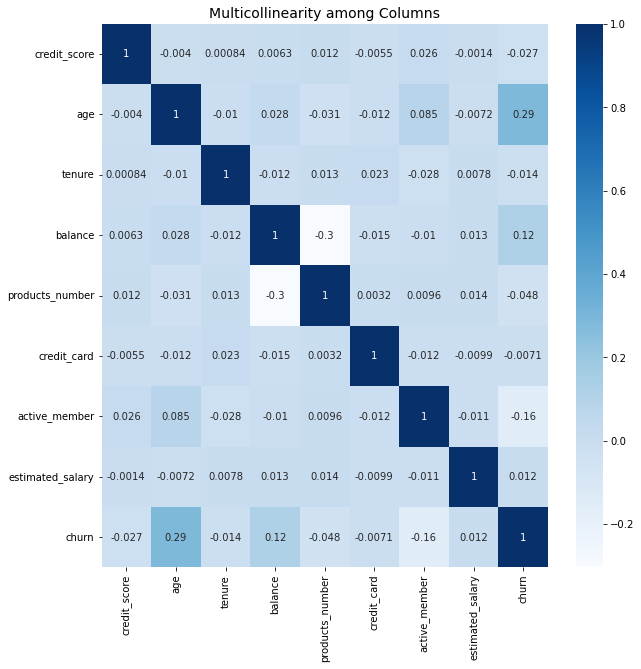

In [7]:
#plot heat map
corr = data.drop(columns = 'customer_id', axis = 1).corr()
fig, ax = plt.subplots(figsize = (10,10))
plt.title('Multicollinearity among Columns', fontsize = 14)
ax = sns.heatmap(corr, cbar = True, annot = True, cmap = 'Blues');

Observations:
1. No high multicollinearity among the variables was observed.All features will be retained
2. age and balance have the highest positive correlation with churn
3. active_member and  products_number have the highest negative correlation with churn

2. Distribution of variables


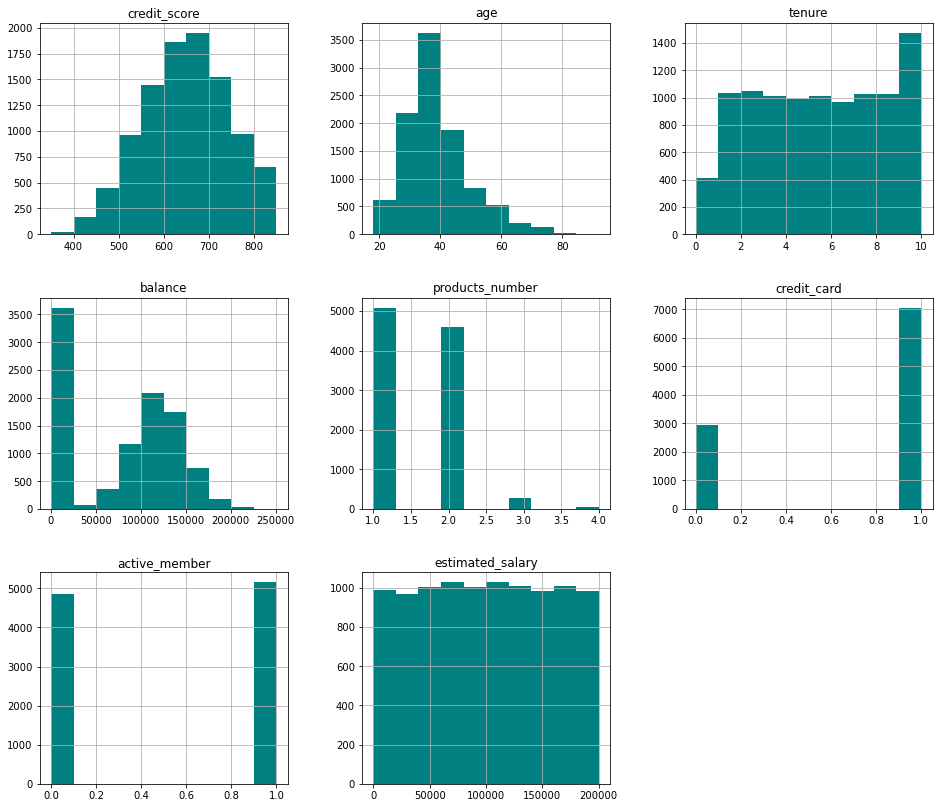

In [8]:
data.drop(columns = ['customer_id', 'churn'], axis = 1).hist(figsize = (16,14), color = 'teal');

1. Credit_score appears to be normally distributed
2. Age has a skewed distribution - which is okay given the context of the dataset as some customers are expected to be older than others and can majorly comprise of a particular age range.
3. Tenure seems to have a normal distribution with '10' having the highest number of customers.
4. Most of the bank's customers have a bank balance of 0, with the second larget group lying in the ranges of 100 and 150 thousand.
5. The estimated salaries are in very close ranges.
6. Most of the customers have credit cards.
7. There is not a significant difference in population of active members to inactive ones.
8. Most customers are subscribed to only one product / service with the bank.


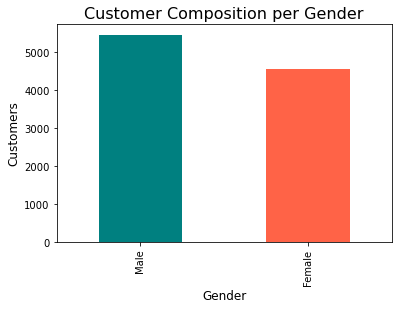

Male      5457
Female    4543
Name: gender, dtype: int64


In [9]:
#Distribution of  gender
data['gender'].value_counts().plot.bar(color = ['teal', 'tomato'])
plt.title('Customer Composition per Gender', fontsize = 16)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.show();
plt.show();
print(pd.Series(data['gender'].value_counts()))

The bank's customers comprise of more Males than Females

In [10]:
#Customer churn according to gender
gender_churn = data.groupby('gender')['churn'].agg(count = 'value_counts')
gender_churn = pd.pivot_table(gender_churn ,columns = 'churn', values = 'count', index = 'gender')
gender_churn

churn,0,1
gender,,
Female,3404,1139
Male,4559,898


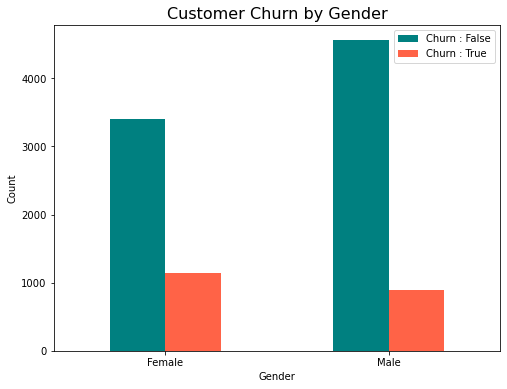

In [11]:
#Visualize churn by gender 
fig, ax = plt.subplots(figsize = (8,6))
gender_churn.plot(ax = ax,
                  kind = 'bar',
                  color = ['teal', 'tomato'],
                  rot = 0)
ax.set_title('Customer Churn by Gender', fontsize = 16)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(labels = ['Churn : False', 'Churn : True'])
plt.show();

In both genders of the customers,there are more unchurned customers that there are churned.

There are more female churned customers than there are male, showing that the likelihood of a female customer unsubscribing from the bank's services

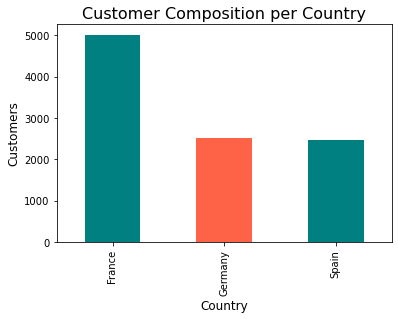

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


In [12]:
#Distribution of Country
data['country'].value_counts().plot.bar(color = ['teal', 'tomato'])
plt.title('Customer Composition per Country', fontsize = 16)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.show();
print(pd.Series(data['country'].value_counts()))

The bank is operational in three European countries : France , Germany and Spain with France having the largest number of customers followed by Germany.

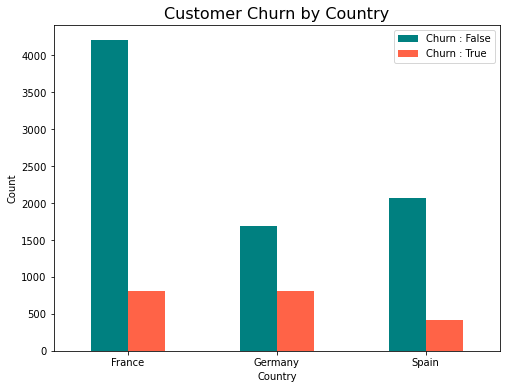

churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413


In [13]:
#Customer churn according to country
country_churn = data.groupby('country')['churn'].agg(count = 'value_counts')
country_churn = pd.pivot_table(country_churn ,columns = 'churn', values = 'count', index = 'country')

#Visualize churn by country
fig, ax = plt.subplots(figsize = (8,6))
country_churn.plot(ax = ax,
                  kind = 'bar',
                  color = ['teal', 'tomato'],
                  rot = 0)
ax.set_title('Customer Churn by Country', fontsize = 16)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.legend(labels = ['Churn : False', 'Churn : True'])
plt.show();
print(country_churn)

Germany has the highest number of churned customers, followed closely by France with Spain having the smallest number.

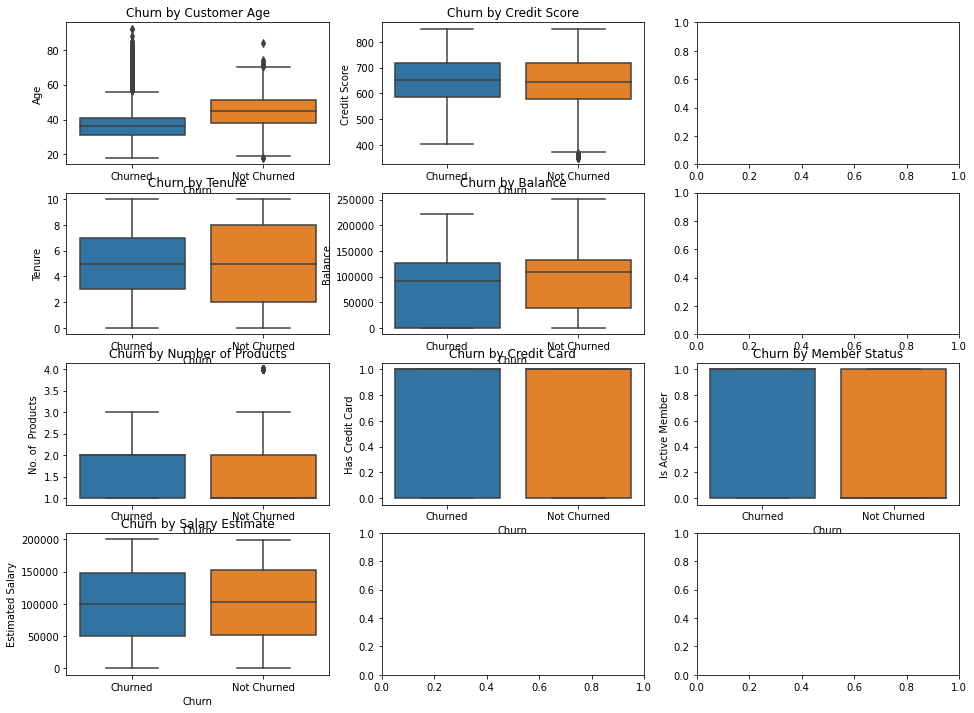

In [14]:
#To visualize churn by other numerical features
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (16,12))
churn_order = {0 : 'Churned', 1:'Not Churned'}
cust_churn = data['churn'].map(churn_order)

variables = ['credit_score','age', 'tenure','balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

#Defining the axis positions
ax0 = axes[0][0]
ax1 = axes[0][1]
ax2= axes[1][0]
ax3 = axes[1][1]
ax4 = axes[2][0]
ax5 = axes[2][1]
ax6 = axes[2][2]
ax7 = axes[3][0]

#Churn vs ag3
sns.boxplot(x = cust_churn, y = data['age'], order = ['Churned','Not Churned'], ax = ax0)
ax0.set_title('Churn by Customer Age')
ax0.set_xlabel('Churn')
ax0.set_ylabel('Age')

#Churn by credit score
sns.boxplot(x = cust_churn, y = data['credit_score'], order = ['Churned','Not Churned'], ax = ax1)
ax1.set_title('Churn by Credit Score')
ax1.set_xlabel('Churn')
ax1.set_ylabel('Credit Score')

#Churn by Tenure
sns.boxplot(x = cust_churn, y = data['tenure'], order = ['Churned','Not Churned'], ax = ax2)
ax2.set_title('Churn by Tenure')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Tenure')

#Churn by Balance
sns.boxplot(x = cust_churn, y = data['balance'], order = ['Churned','Not Churned'], ax = ax3)
ax3.set_title('Churn by Balance')
ax3.set_xlabel('Churn')
ax3.set_ylabel('Balance')

#Churn by Number of Products
sns.boxplot(x = cust_churn, y = data['products_number'], order = ['Churned','Not Churned'], ax = ax4)
ax4.set_title('Churn by Number of Products')
ax4.set_xlabel('Churn')
ax4.set_ylabel('No. of  Products')

#Churn by credit card
sns.boxplot(x = cust_churn, y = data['credit_card'], order = ['Churned','Not Churned'], ax = ax5)
ax5.set_title('Churn by Credit Card')
ax5.set_xlabel('Churn')
ax5.set_ylabel('Has Credit Card')

#Churn by member status
sns.boxplot(x = cust_churn, y = data['active_member'], order = ['Churned','Not Churned'], ax = ax6)
ax6.set_title('Churn by Member Status')
ax6.set_xlabel('Churn')
ax6.set_ylabel('Is Active Member')

#Churn by estimated salary
sns.boxplot(x = cust_churn, y = data['estimated_salary'], order = ['Churned','Not Churned'], ax = ax7)
ax7.set_title('Churn by Salary Estimate')
ax7.set_xlabel('Churn')
ax7.set_ylabel('Estimated Salary')


plt.show();

3. Check for distribution of the target variable

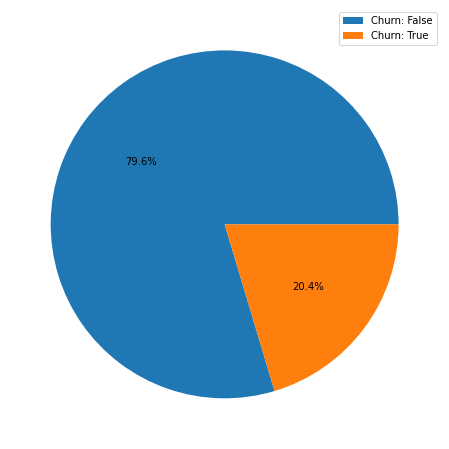

In [15]:
target = data['churn'].agg(count = 'value_counts')
#print(pd.Series(data['churn'].agg(count = 'value_counts')))
plt.subplots(figsize = (12,8))
labels = ['Churn: False', 'Churn: True']
plt.pie(target,  autopct='%1.1f%%')
plt.legend(labels = labels)
plt.show();

The target variable is a binary item , indicating whether or not a customer is churned.

The pie chart clearly shows that there is an imbalance.

Unchurned customers comprise of 79.6% of the dataset while churned customers comprise of only 20.4%.

## Modeling

### Model 1: Logistic Regression

In [102]:
#Libraries to be used
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


The dataset has 0 missing data 

In [73]:
#To remove the unique identifier as it is not necessary for the modeling process
data = data.drop(columns = 'customer_id')
print(data.shape)
data.head()

(10000, 11)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Transforming Categorical Variables.

In [108]:
def ohe(df, variable):
    df_ohe = df[variable].astype('category')
    df_ohe = pd.get_dummies(df_ohe, prefix = variable, drop_first = True)
    df = pd.concat([df,df_ohe], axis=1)
    df = df.drop(variable, axis = 1)
    return df

categoricals =  ['gender', 'country']
logreg_data = ohe(data, categoricals)
logreg_data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Male,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Splitting the target variable from the predictors

In [109]:
y = logreg_data['churn']
X = logreg_data.drop(columns = ['churn'], axis = 1)

Splitting the data into train and test sets using a test size 0f 30% and train size of 70%.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.3)
print(f'X_train size: {X_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test size: {y_test.shape}')

X_train size: (7000, 11)
y_train size: (7000,)
X_test size: (3000, 11)
y_test size: (3000,)


The training data and test data have 7000 and 3000 observations respectively.

#### Feature Scaling 'balance' and 'estimated_salary' to cater for the variance in range

In [112]:
#instatiating the standard scaler
scaler = StandardScaler()

#fitting the X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Due to the class imbalance seen above, to give our model a chance to be able to predict both classes, SMOTE will be employed.

In [113]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [114]:
#Fitting the model on the training data
LogReg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_lr = LogReg.fit(X_train_smote, y_train_smote)
model_lr

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [122]:
#making predictions using the training data
y_train_pred = model_lr.predict(X_train_scaled)
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

#### Evaluating the model's performance

In [116]:
cm_train = confusion_matrix(y_train, y_train_pred)
ps_train = precision_score(y_train, y_train_pred)
rs_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred)

print(f'Train Confusion matrix :{ cm_train}')
print(f'Train Precision score:{ ps_train}')
print(f'Train Recall score:{rs_train}')
print(f'Train F1 score:{ f1_train}')
print(f'ROC - AUC score:{ auc_train}')

Train Confusion matrix :[[3415 2132]
 [ 297 1156]]
Train Precision score:0.3515815085158151
Train Recall score:0.7955953200275292
Train F1 score:0.487660831048302
ROC - AUC score:0.7056217090492792


In [117]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      5547
           1       0.35      0.80      0.49      1453

    accuracy                           0.65      7000
   macro avg       0.64      0.71      0.61      7000
weighted avg       0.80      0.65      0.69      7000



The model performed better in predicting unchurned cases, this was expected given the imbalance in the dataset. 
The f1 score will be the used metric in this case due to class imbalance.

#### Making predictions using the Test data

In [119]:
y_pred_test = model_lr.predict(X_test_scaled)
y_pred_test

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [121]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.61      0.74      2416
           1       0.33      0.79      0.47       584

    accuracy                           0.65      3000
   macro avg       0.63      0.70      0.60      3000
weighted avg       0.81      0.65      0.68      3000



The model performed slighly worse on the testing data than it did on the training data. There is also a similar trend where it was able to make predictions of one class significantly better than it was of the other.

The second model will include feature engineering and hyperparameter tuning to try and improve on prediction performance on both classes

### Model 2 : Random Forests

In [193]:
#Libraries to be used
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Feature Engineering to help our model understand the data better

1. Credit_score
Categorize each customer's credit score using the below ranges:

 300 - 400 : Bad
 
 630 - 689 : Fair
 
 690 - 719 : Good
 
 720 - 850 : Excellent

In [194]:
#a function that return's the rating bases on the credit score
def credit_rating(credit_score):
    if credit_score in range(300,630):
        rating = 'Bad'
    elif credit_score in range(630,690):
        rating = 'Fair'
    elif credit_score in range(690,720):
        rating = 'Good'
    elif credit_score in range(720,851):
        rating = 'Excellent'
        
    return rating

#adding a column with credit ratings
data_2 = data.copy()
data_2['credit_rating'] = data_2['credit_score'].apply(lambda x : credit_rating(x))
data_2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_rating
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bad
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bad
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bad
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


#### 2. Balance - to create two categories:
 0 - a customer with a bank balance of 0
 
 1 - a customer with a bank balance greater than 0

In [135]:
data_2['ac_balance'] = data_2['balance'].apply(lambda x: (0 if x == 0 else 1))
data_2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_rating,ac_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Bad,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Bad,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Bad,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent,1


In [195]:
#To drop the original columns that were engineered
data_2 = data_2.drop(columns = ['credit_score', 'balance'], axis = 1)
print(data.shape)
data_2.head()

(10000, 11)


,country,gender,age,tenure,products_number,credit_card,active_member,estimated_salary,churn,credit_rating
0,France,Female,42,2,1,1,1,101348.88,1,Bad
1,Spain,Female,41,1,1,0,1,112542.58,0,Bad
2,France,Female,42,8,3,1,0,113931.57,1,Bad
3,France,Female,39,1,2,0,0,93826.63,0,Good
4,Spain,Female,43,2,1,1,1,79084.10,0,Excellent


In [186]:
#numeric varaibles
categoricals = ['country', 'gender','credit_rating']
numericals = [i for i in X.columns if i not in categoricals]

data_2 = ohe(data_2,categoricals )

In [196]:
#Dividing the data into target and predictors
X = data_2.drop('churn', axis = 1)
y = data_2['churn']

In [197]:
#Splitting into train and test sets using a test size of 30%
X_train, X_test,y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

### Building a pre-processing pipeline

In [198]:
#numeric varaibles
categoricals = ['country', 'gender','credit_rating']
numericals = [i for i in X.columns if i not in categoricals]

#list with the index of each variable
cats = [X.columns.get_loc(i) for i in categoricals]
nums = [X.columns.get_loc(i) for i in numericals]

#creating a pre-processor
preprocess = ColumnTransformer(
              [('scaler', StandardScaler(), nums),
              ('encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), cats)],
               remainder = 'passthrough')
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 [2, 3, 4, 5, 6, 7]),
                                ('encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [0, 1, 8])])

In [199]:
#creating a model with a pipeline
rf_clf = imbl_pipe(preprocess,
                     SMOTE(sampling_strategy = 'auto', random_state = 42),
                     RandomForestClassifier())
rf_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [2, 3, 4, 5, 6, 7]),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 8])])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier', RandomForestClassifier())])

### Hyperparameter Tuning using GridSearchCv 

In [200]:
# parameter grid with t=a combination of hyperparameters to be used
rf_param_grid = {'randomforestclassifier__criterion':['gini', 'entropy'],
                 'randomforestclassifier__max_depth':[None, 2, 3, 4, 5, 6],
                 'randomforestclassifier__min_samples_split':[2, 5, 10],
                 'randomforestclassifier__min_samples_leaf':[1, 2, 3, 4, 5, 6]}

# instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv =3, return_train_score = True)

# Fit to the data
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [2, 3,
                                                                          4, 5,
                                                                          6,
                                                                          7]),
                                                                        ('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                 